In [45]:
print("""
========================================================================================================================================================
                                                                  HEART DISEASE PREDICTION
========================================================================================================================================================

Course Name       : Data Science Lab
Project Name      : Heart Disease Prediction
Group Number      : 19
Members           :
                    Pritom Roy (2022331044)
                    Mahi A Rashed Mashfik (2022331062)

Tools             : Python, Pandas, Seaborn, Scikit-learn, Matplotlib

--------------------------------------------------------------------------------------------------------------------------------------------------------

Project Workflow:
  1. Data Set from Kaggle
  2. Data Preprocessing
  3. Data Exploration
  4. Data Analysis
  5. Data Distribution
  6. Data Selection for Model Evaluation
  7. Model Building using Machine Learning Algorithm such as K-Nearest Neighbors (KNN)
  8. Evaluation using metrics like accuracy, precision, recall, and confusion matrices
  9. Optimization for better performance
  10. Final evaluation with optimized model
  11. User Interaction System, where users can input personal health information
      to receive a personalized heart disease risk assessment, along with risk factors and recommendations.
========================================================================================================================================================
""")



                                                                  HEART DISEASE PREDICTION

Course Name       : Data Science Lab
Project Name      : Heart Disease Prediction
Group Number      : 19
Members           :
                    Pritom Roy (2022331044)
                    Mahi A Rashed Mashfik (2022331062)

Tools             : Python, Pandas, Seaborn, Scikit-learn, Matplotlib

--------------------------------------------------------------------------------------------------------------------------------------------------------

Project Workflow:
  1. Data Set from Kaggle
  2. Data Preprocessing
  3. Data Exploration
  4. Data Analysis
  5. Data Distribution
  6. Data Selection for Model Evaluation
  7. Model Building using Machine Learning Algorithm such as K-Nearest Neighbors (KNN)
  8. Evaluation using metrics like accuracy, precision, recall, and confusion matrices
  9. Optimization for better performance
  10. Final evaluation with optimized model
  11. User Interaction Sy

In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for barplot or correlation heatmap
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV # GridSearchCV to find the best para meter for model
from sklearn.preprocessing import StandardScaler, LabelEncoder # LabelEncoder for converting catergorical data into integer 
from sklearn.neighbors import KNeighborsClassifier # for KNN algorithm 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # to measure model performance
from sklearn.impute import SimpleImputer # fill up the missing value row with mean or median
from scipy.stats import shapiro, anderson
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('heart.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Shape: (918, 12)

First 5 rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
--

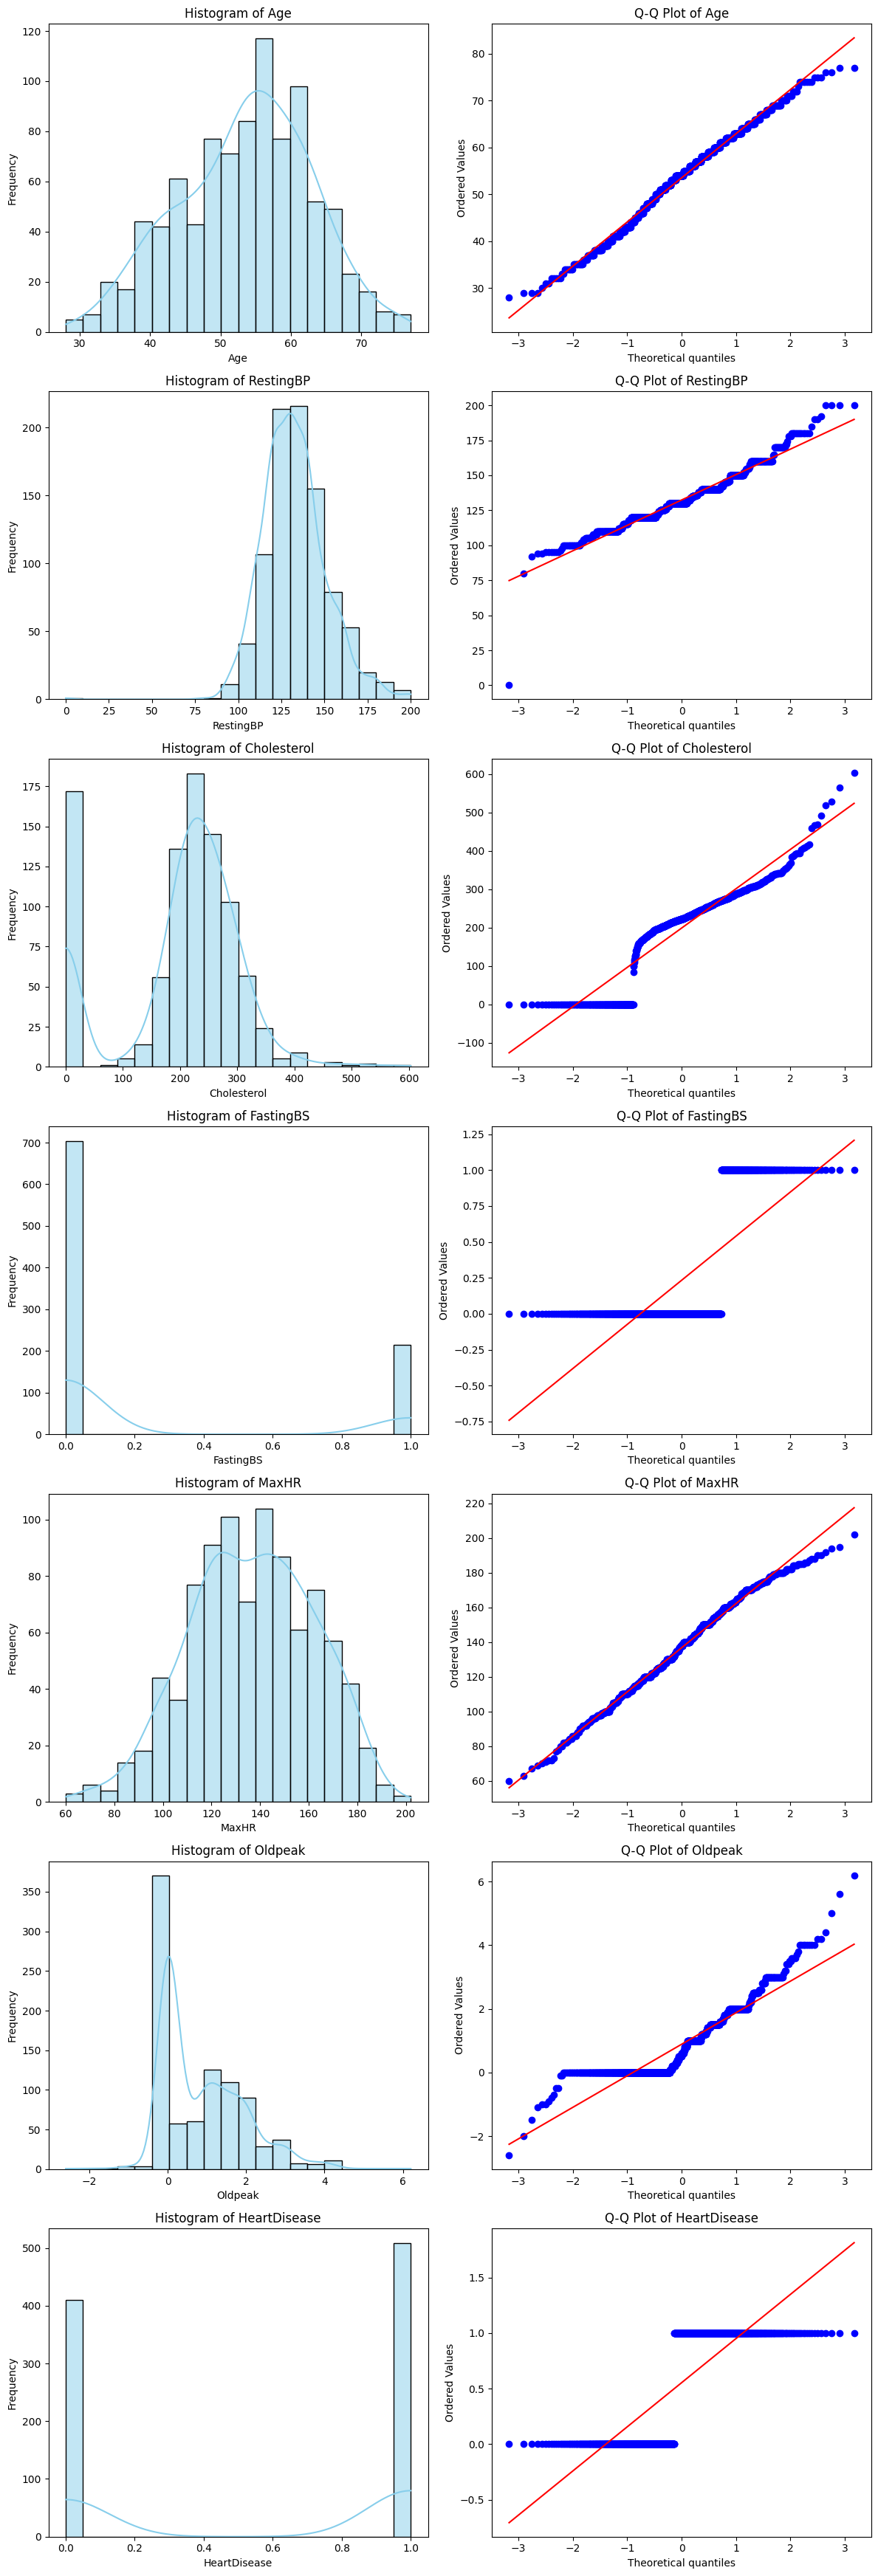

In [47]:
# Normality check. Bell shaped for normal distribution

num_cols = df.select_dtypes(include='number').columns
n = len(num_cols)

total_plots = n * 2

# rows and columns
cols = 2  # Histogram & Q-Q plot side by side
rows = n

plt.figure(figsize=(12, 5*rows))

for i, col in enumerate(num_cols):
    # Histogram
    plt.subplot(rows, 2, 2*i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Q-Q Plot
    plt.subplot(rows, 2, 2*i + 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.show()

In [48]:
# Theory recap for

# Shapiro-Wilk Test: 
#     p-value > 0.05 → Normal
#     p-value ≤ 0.05 → Not Normal
# Anderson-Darling Test:
#     statistic < 5% critical → Normal
#     statistic ≥ 5% critical → Not Normal

num_cols = df.select_dtypes(include='number').columns
results = []

print("\n================ NORMALITY TEST RESULTS ================\n")

for col in num_cols:
    data = df[col].dropna()

    # Shapiro-Wilk Test
    sw_stat, sw_p = shapiro(data)

    # Anderson-Darling Test
    ad_test = anderson(data, dist='norm')
    ad_stat = ad_test.statistic
    critical_value = ad_test.critical_values[2]  # 5% level

    # Interpretation
    sw_interpret = "Normal Distribution" if sw_p > 0.05 else "Not Normal"
    ad_interpret = "Normal Distribution" if ad_stat < critical_value else "Not Normal"

    # Print nice readable result for each column
    print(f"\nColumn: {col}")
    print("-" * (8 + len(col)))
    print(f"Shapiro-Wilk Statistic : {sw_stat:.4f}")
    print(f"Shapiro-Wilk p-value   : {sw_p:.6f}")
    print(f"→ Interpretation        : {sw_interpret}")

    print(f"\nAnderson-Darling Statistic : {ad_stat:.4f}")
    print(f"AD Critical Value (5%)     : {critical_value:.4f}")
    print(f"→ Interpretation            : {ad_interpret}")
    print("\n--------------------------------------------------------")

    # Save results for DataFrame
    results.append({
        "Column": col,
        "Shapiro_Statistic": sw_stat,
        "Shapiro_p_value": sw_p,
        "Shapiro_Interpretation": sw_interpret,
        "Anderson_Statistic": ad_stat,
        "AD_Critical_5%": critical_value,
        "Anderson_Interpretation": ad_interpret
    })

# Create the summary table
normality_df = pd.DataFrame(results)



================ NORMALITY TEST RESULTS ================


Column: Age
-----------
Shapiro-Wilk Statistic : 0.9910
Shapiro-Wilk p-value   : 0.000022
→ Interpretation        : Not Normal

Anderson-Darling Statistic : 2.7804
AD Critical Value (5%)     : 0.7840
→ Interpretation            : Not Normal

--------------------------------------------------------

Column: RestingBP
-----------------
Shapiro-Wilk Statistic : 0.9580
Shapiro-Wilk p-value   : 0.000000
→ Interpretation        : Not Normal

Anderson-Darling Statistic : 7.6189
AD Critical Value (5%)     : 0.7840
→ Interpretation            : Not Normal

--------------------------------------------------------

Column: Cholesterol
-------------------
Shapiro-Wilk Statistic : 0.8706
Shapiro-Wilk p-value   : 0.000000
→ Interpretation        : Not Normal

Anderson-Darling Statistic : 49.8611
AD Critical Value (5%)     : 0.7840
→ Interpretation            : Not Normal

--------------------------------------------------------

Column: Fas

<Figure size 1500x1200 with 0 Axes>

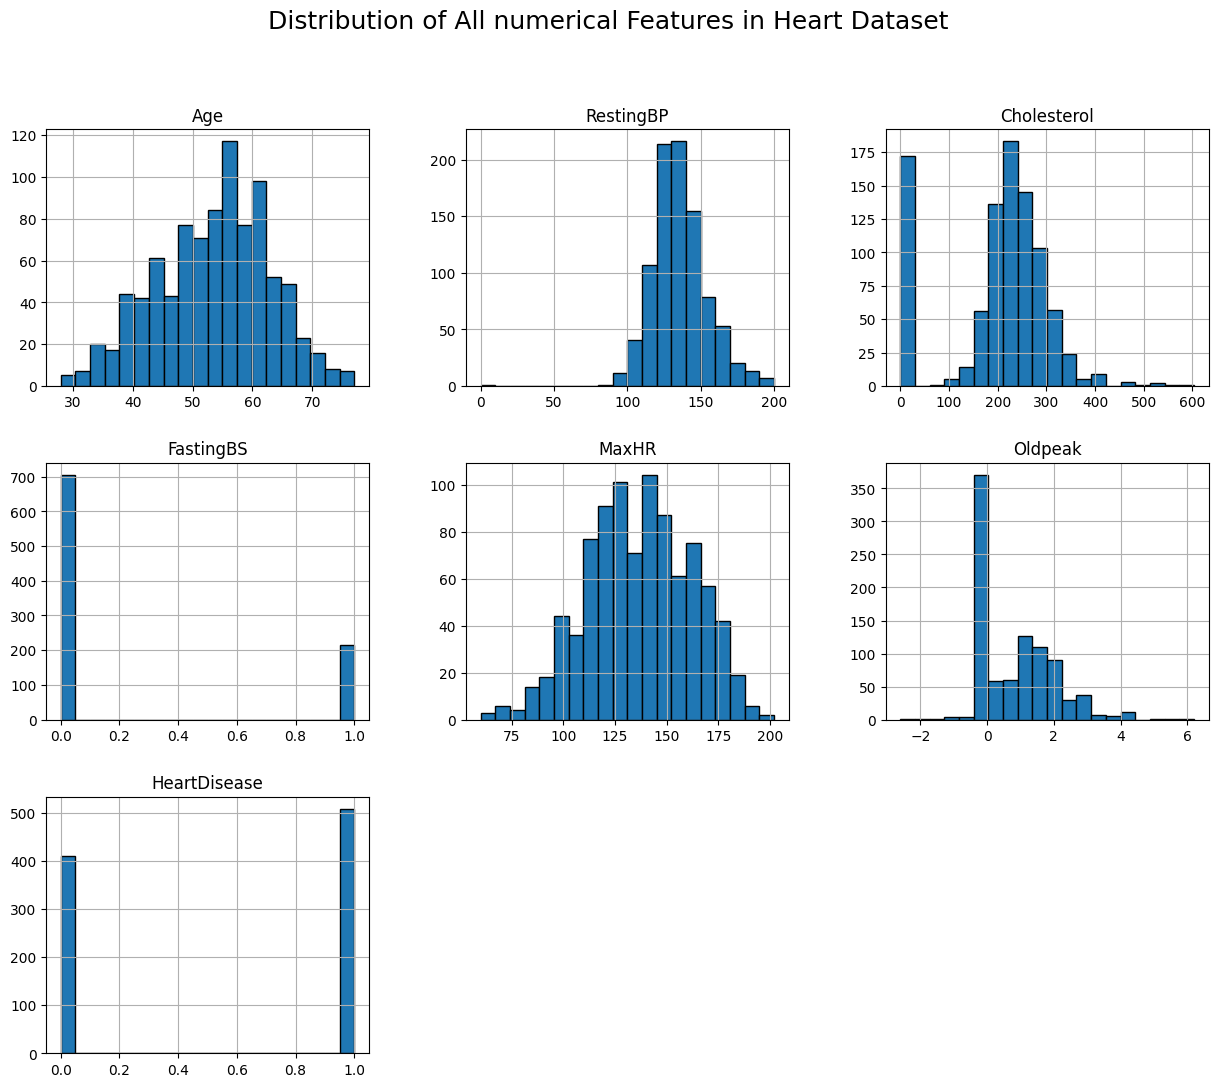

In [49]:
# Distribution plots for all numerical features
plt.figure(figsize=(15, 12)) # figure window 
df.hist(bins=20, edgecolor='black', figsize=(15, 12)) # .hist() for all numerical columns 
plt.suptitle('Distribution of All numerical Features in Heart Dataset', fontsize=18)
plt.show()

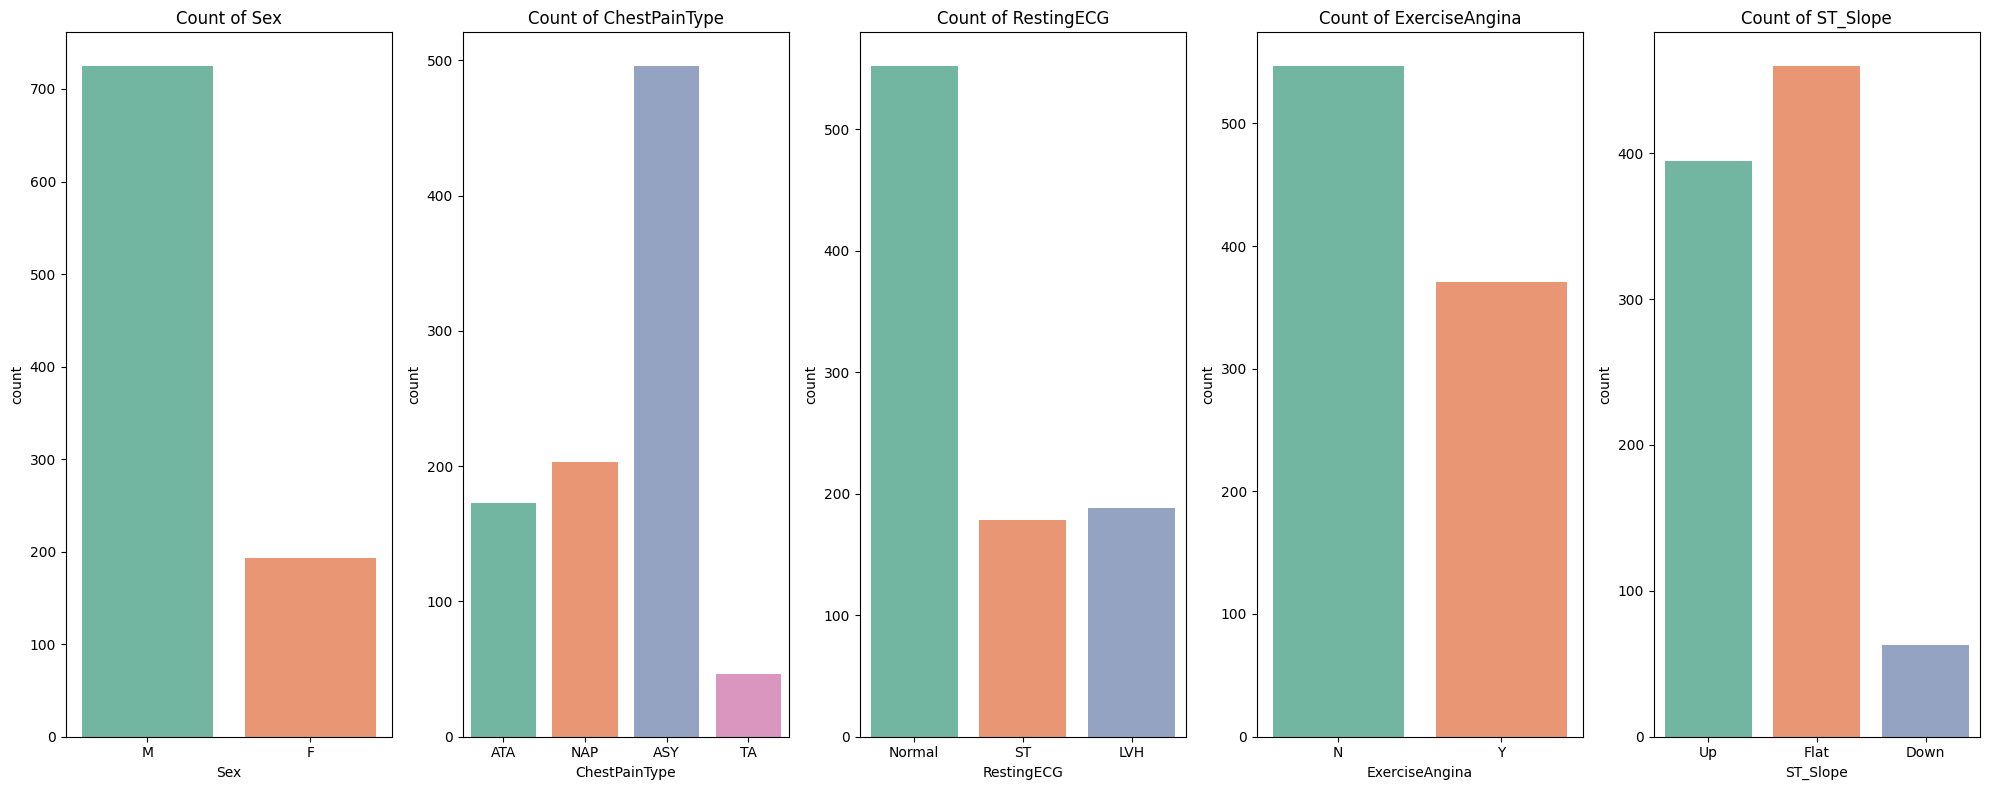

In [50]:
# Select categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

plt.figure(figsize=(20, 8))
# for loop for every categorical features to plot their own plot
for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, len(categorical_features), i)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()


In [51]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum()) # .sum() to count in each columns how many missing values are present

# Check for invalid values (like zero in medical measurements)
print("\nChecking for invalid values:")
print("Zero values in RestingBP:", (df['RestingBP'] == 0).sum())
print("Zero values in Cholesterol:", (df['Cholesterol'] == 0).sum())

# Handle invalid values - replace zeros with median
# median because it is not manipulated by the extreme values
# RestingBP should not be zero
df['RestingBP'] = df['RestingBP'].replace(0, df['RestingBP'].median())

# Cholesterol should not be zero - replace with median
df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].median())

# Check the distribution of target variable
print("\nTarget Variable Distribution:")
print(df['HeartDisease'].value_counts())
print(df['HeartDisease'].value_counts(normalize=True)) # normalize=True for finding the percentage value

# Encode categorical variables
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# LabelEncoder() give an unique int value for every string values
# fit_transform() in one step it makes data fit and transform from str to int
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder() 
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    # to show for str values which int is given 
    print(f"\n{col} encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Here all data are in numerical form, neat & clean and ready for training.
print("\nData after encoding:")
print(df.head())

Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Checking for invalid values:
Zero values in RestingBP: 1
Zero values in Cholesterol: 172

Target Variable Distribution:
HeartDisease
1    508
0    410
Name: count, dtype: int64
HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

Sex encoding: {'F': np.int64(0), 'M': np.int64(1)}

ChestPainType encoding: {'ASY': np.int64(0), 'ATA': np.int64(1), 'NAP': np.int64(2), 'TA': np.int64(3)}

RestingECG encoding: {'LVH': np.int64(0), 'Normal': np.int64(1), 'ST': np.int64(2)}

ExerciseAngina encoding: {'N': np.int64(0), 'Y': np.int64(1)}

ST_Slope encoding: {'Down': np.int64(0), 'Flat': np.int64(1), 'Up': np.int64(2)}

Data after encoding:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  Resting

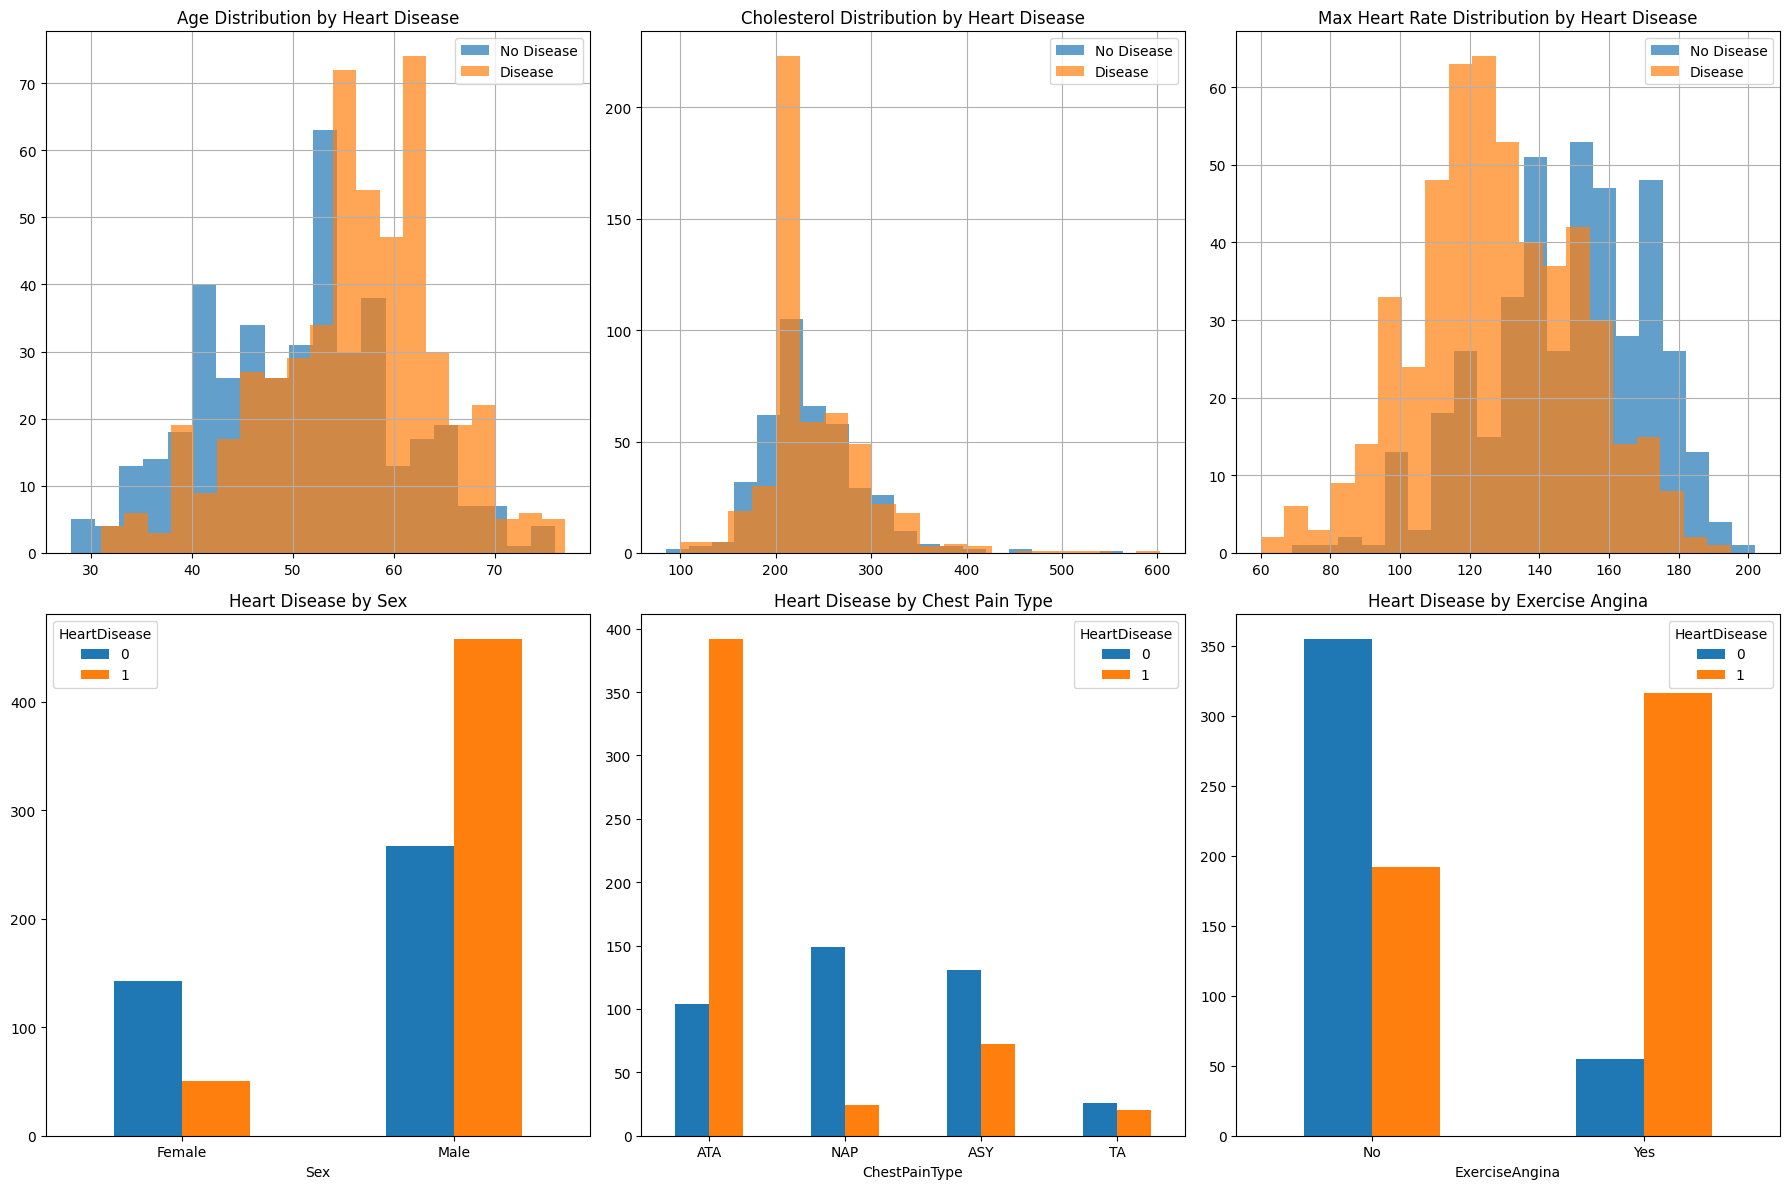

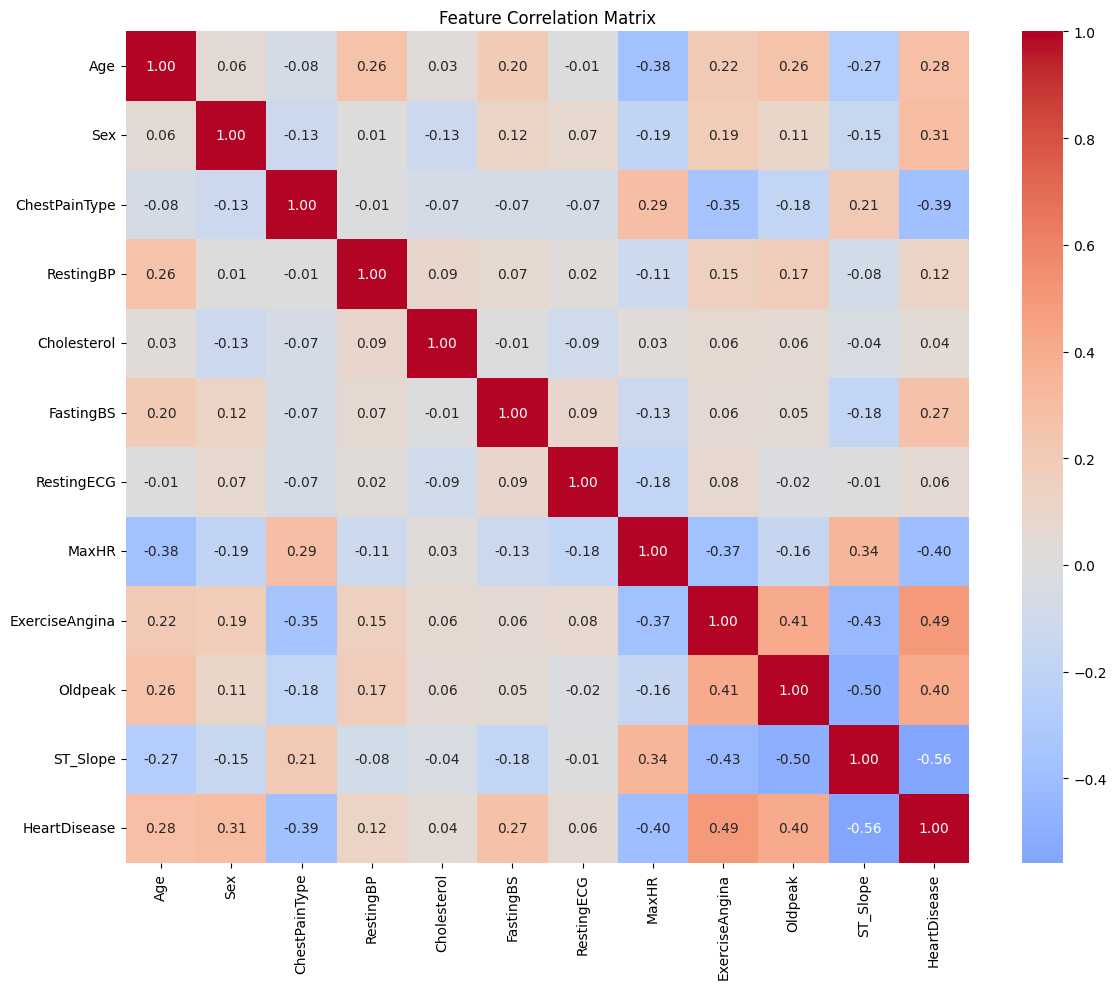

Key Insights:
Average age for heart disease: 55.9
Average age without heart disease: 50.6
Average MaxHR for heart disease: 127.7
Average MaxHR without heart disease: 148.2


In [52]:
# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12)) # 2 rows and 3 columns

# 1. Age distribution by heart disease
# alpha=0.7 for transparency between two histogram
df[df['HeartDisease'] == 0]['Age'].hist(alpha=0.7, label='No Disease', ax=axes[0,0], bins=20)
df[df['HeartDisease'] == 1]['Age'].hist(alpha=0.7, label='Disease', ax=axes[0,0], bins=20)
axes[0,0].set_title('Age Distribution by Heart Disease')
axes[0,0].legend()

# 2. Cholesterol distribution
df[df['HeartDisease'] == 0]['Cholesterol'].hist(alpha=0.7, label='No Disease', ax=axes[0,1], bins=20)
df[df['HeartDisease'] == 1]['Cholesterol'].hist(alpha=0.7, label='Disease', ax=axes[0,1], bins=20)
axes[0,1].set_title('Cholesterol Distribution by Heart Disease')
axes[0,1].legend()

# 3. Max Heart Rate distribution
df[df['HeartDisease'] == 0]['MaxHR'].hist(alpha=0.7, label='No Disease', ax=axes[0,2], bins=20)
df[df['HeartDisease'] == 1]['MaxHR'].hist(alpha=0.7, label='Disease', ax=axes[0,2], bins=20)
axes[0,2].set_title('Max Heart Rate Distribution by Heart Disease')
axes[0,2].legend()

# 4. Heart disease by sex
sex_counts = pd.crosstab(df['Sex'], df['HeartDisease'])
sex_counts.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Heart Disease by Sex')
axes[1,0].set_xticklabels(['Female', 'Male'], rotation=0)

# 5. Heart disease by chest pain type
chest_pain_counts = pd.crosstab(df['ChestPainType'], df['HeartDisease'])
chest_pain_counts.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Heart Disease by Chest Pain Type')
axes[1,1].set_xticklabels(['ATA', 'NAP', 'ASY', 'TA'], rotation=0)

# 6. Heart disease by exercise angina
angina_counts = pd.crosstab(df['ExerciseAngina'], df['HeartDisease'])
angina_counts.plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Heart Disease by Exercise Angina')
axes[1,2].set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.show()

# Correlation heatmap to see the relation between features with target variables.
# It is important for features selection.
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr() # determine correlation for every variables
# anoot=True for giving the values
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Detailed analysis of key features
print("Key Insights:")
print(f"Average age for heart disease: {df[df['HeartDisease'] == 1]['Age'].mean():.1f}")
print(f"Average age without heart disease: {df[df['HeartDisease'] == 0]['Age'].mean():.1f}")
print(f"Average MaxHR for heart disease: {df[df['HeartDisease'] == 1]['MaxHR'].mean():.1f}")
print(f"Average MaxHR without heart disease: {df[df['HeartDisease'] == 0]['MaxHR'].mean():.1f}")

In [53]:
# Analyze feature importance with correlation to target
target_corr = correlation_matrix['HeartDisease'].sort_values(ascending=False)
print("Correlation with Heart Disease:")
print(target_corr)

# Select features with reasonable correlation (absolute value > 0.1)
selected_features = target_corr[abs(target_corr) > 0.1].index.tolist()
selected_features.remove('HeartDisease')  # Remove target variable

print(f"\nSelected features: {selected_features}")

# Prepare features and target
X = df[selected_features]
y = df['HeartDisease']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Correlation with Heart Disease:
HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.117798
RestingECG        0.057384
Cholesterol       0.042988
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64

Selected features: ['ExerciseAngina', 'Oldpeak', 'Sex', 'Age', 'FastingBS', 'RestingBP', 'ChestPainType', 'MaxHR', 'ST_Slope']
Feature matrix shape: (918, 9)
Target vector shape: (918,)


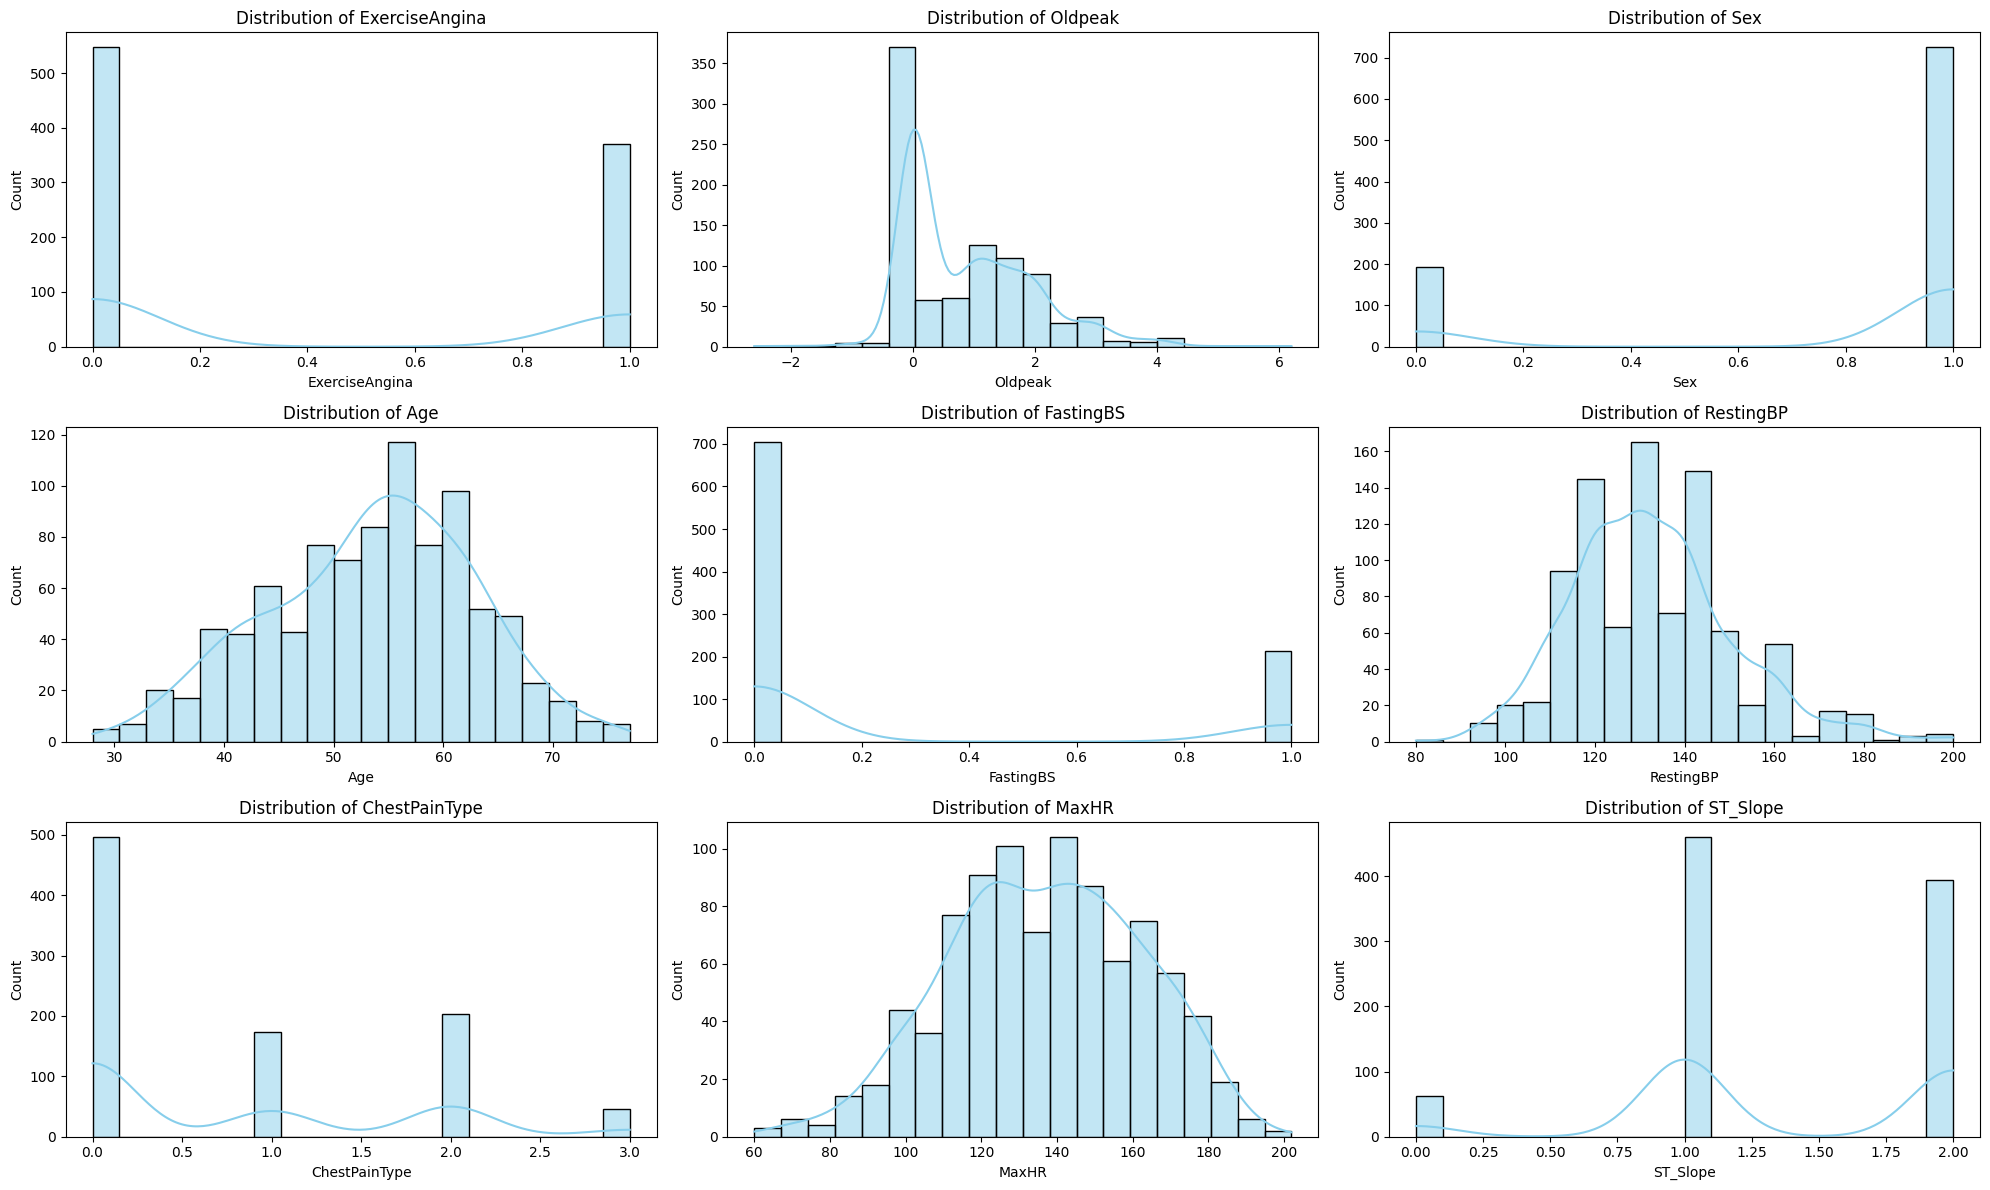

In [54]:
selected_features = ['ExerciseAngina', 'Oldpeak', 'Sex', 'Age', 
                     'FastingBS', 'RestingBP', 'ChestPainType', 'MaxHR', 'ST_Slope']

plt.figure(figsize=(20, 12))

for i, col in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    if df[col].dtype in ['int64', 'float64']:  # Numeric
        sns.histplot(df[col], bins=20, kde=True, color='skyblue')
        plt.title(f'Distribution of {col}')
    else:  # Categorical
        sns.countplot(x=col, data=df, palette='Set2')
        plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()


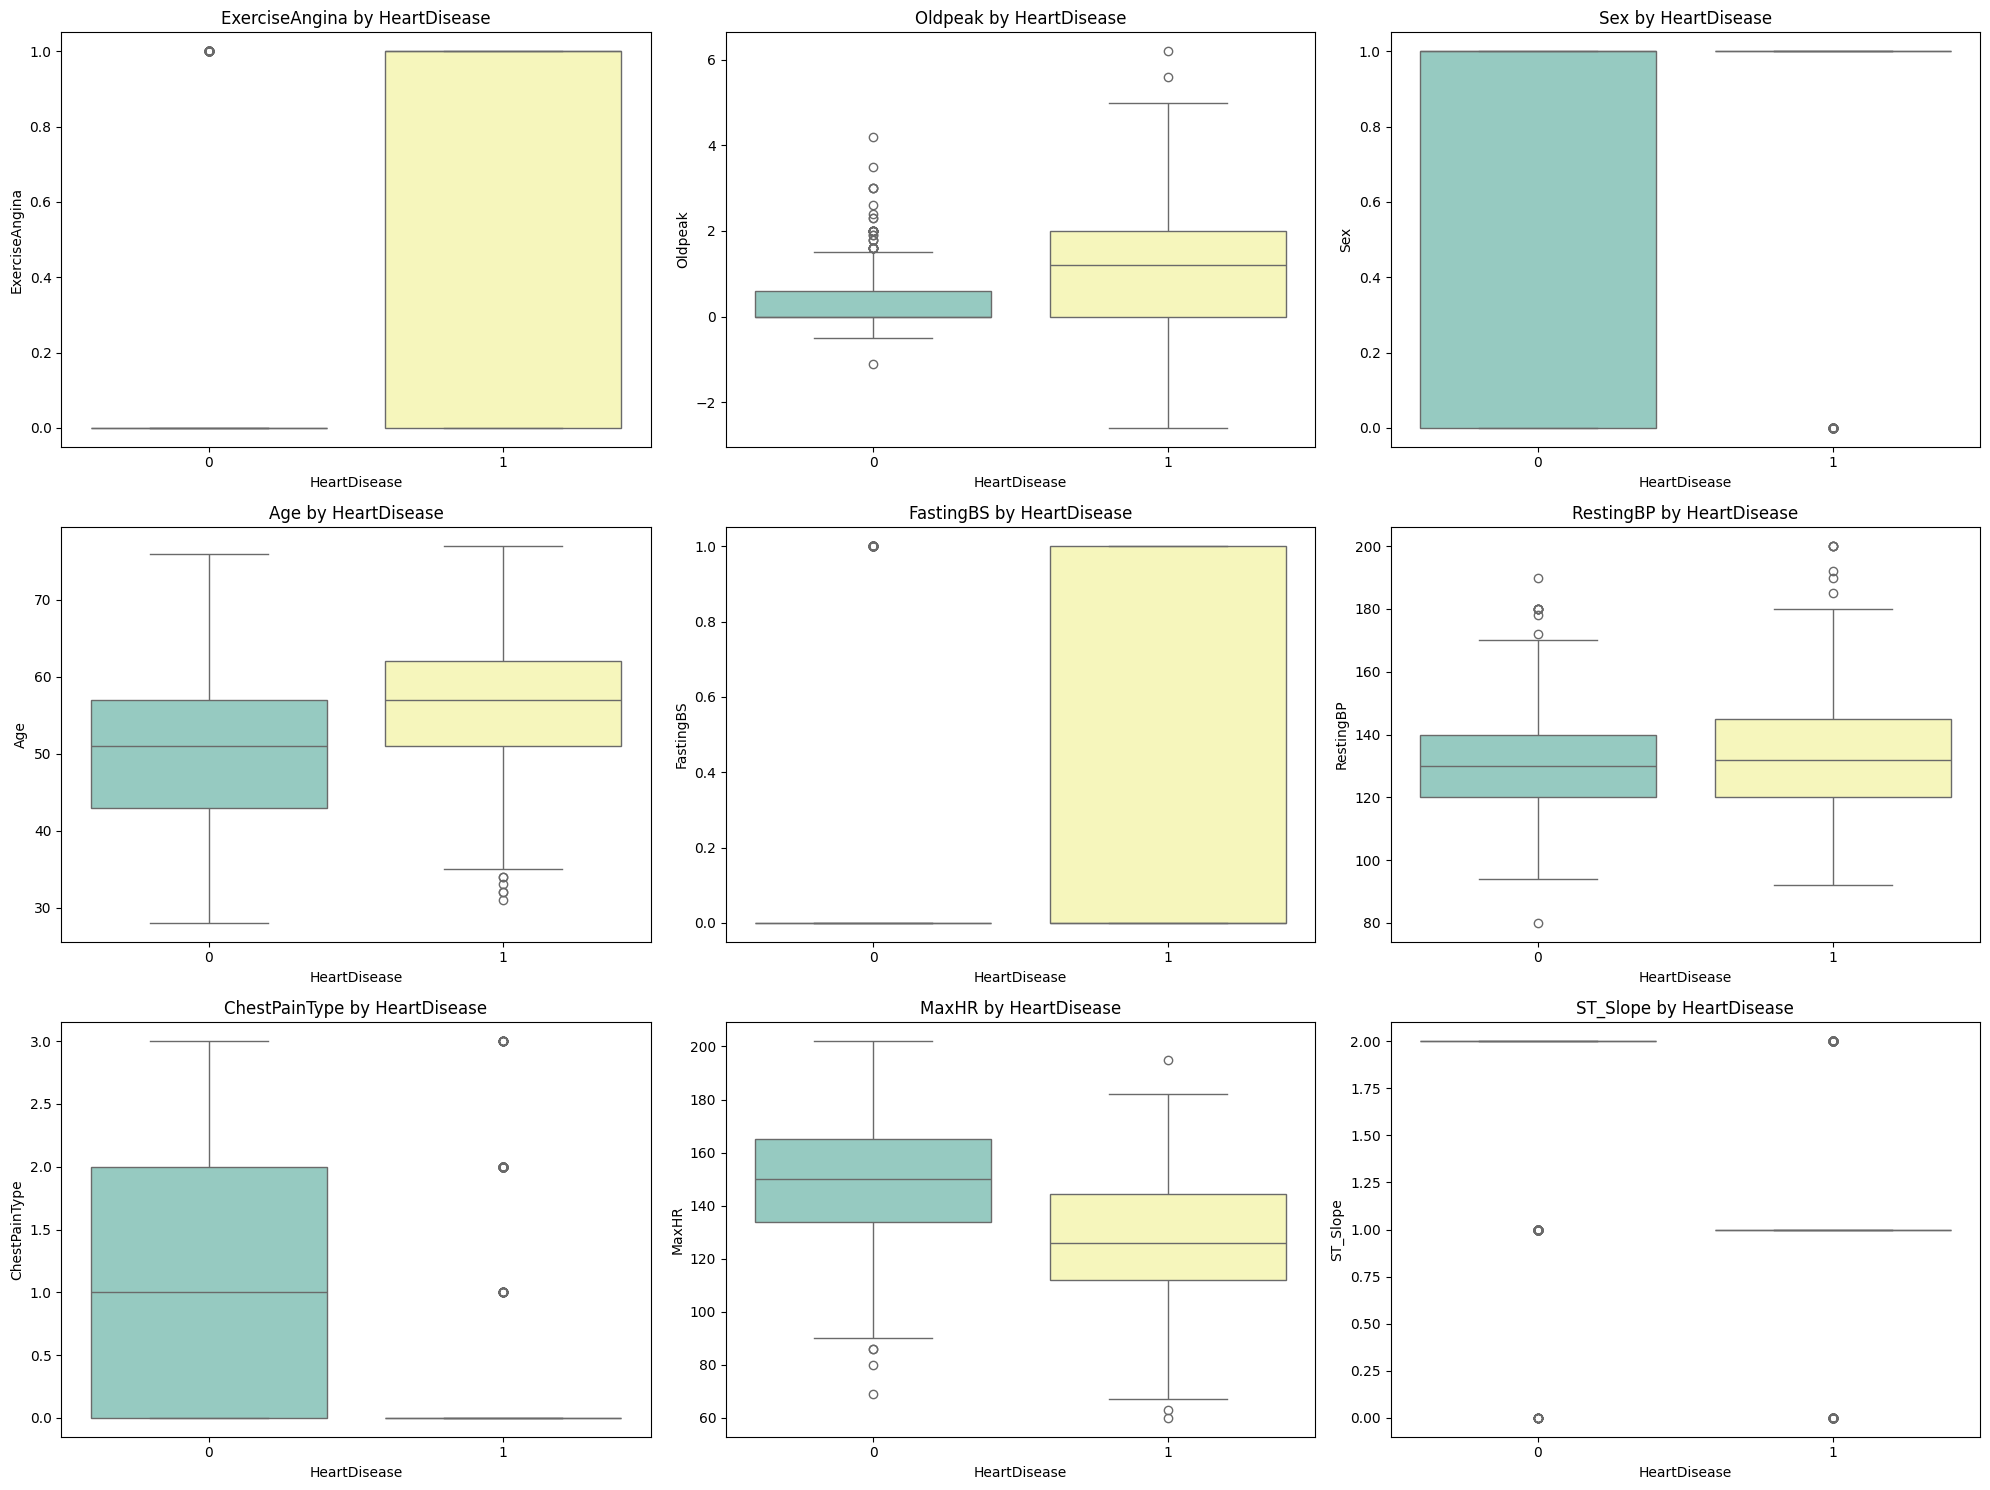

In [55]:
selected_features = ['ExerciseAngina', 'Oldpeak', 'Sex', 'Age', 
                     'FastingBS', 'RestingBP', 'ChestPainType', 'MaxHR', 'ST_Slope']

plt.figure(figsize=(20, 15))

for i, col in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    if df[col].dtype in ['int64', 'float64']:  # Numeric
        sns.boxplot(x='HeartDisease', y=col, data=df, palette='Set3')
        plt.title(f'{col} by HeartDisease')
    else:  # Categorical
        sns.countplot(x=col, hue='HeartDisease', data=df, palette='Set2')
        plt.title(f'{col} by HeartDisease')
plt.tight_layout()
plt.show()


Training set size: (734, 9)
Test set size: (184, 9)
Initial KNN Model Performance (k=5):
Accuracy: 0.8641

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        82
           1       0.88      0.87      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



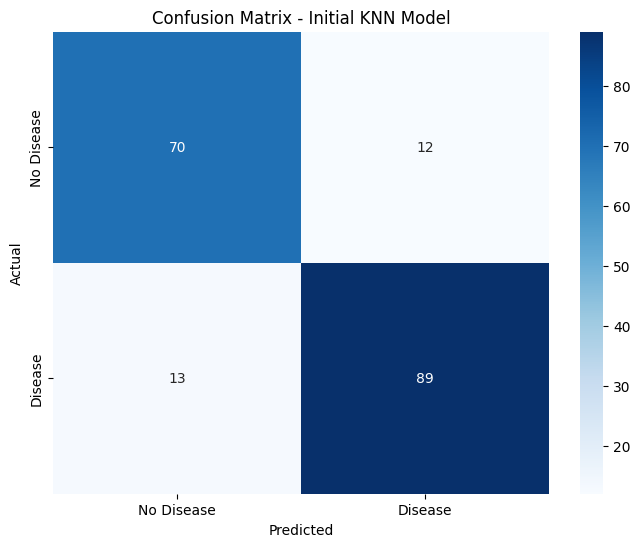

In [56]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Scale the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build initial KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate initial model
print("Initial KNN Model Performance (k=5):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
# True Positive: Actial and Predicted both are predict Yes for Disease
# True Negative: Actial and Predicted both are predict Yes for No Disease
# False Positive: Actual No Disease, while Model predicts Disease
# False Negative: Actual Yes Disease, while Model predicts No Disease; which is dangerous. 
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Initial KNN Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [57]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform grid search with cross-validation
knn_optimized = KNeighborsClassifier()
grid_search = GridSearchCV(knn_optimized, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Use the best model
best_knn = grid_search.best_estimator_
y_pred_optimized = best_knn.predict(X_test_scaled)

# Evaluate optimized model
print("\nOptimized KNN Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimized))

Best Parameters from Grid Search:
{'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}
Best Cross-Validation Score: 0.8664

Optimized KNN Model Performance:
Accuracy: 0.8913

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



FINAL MODEL EVALUATION
Final Accuracy: 0.8913
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184


Feature Importance (Permutation Importance):
          feature  importance       std
8        ST_Slope    0.078804  0.013587
6   ChestPainType    0.045109  0.011413
4       FastingBS    0.037500  0.007065
2             Sex    0.036413  0.011669
1         Oldpeak    0.035870  0.011707
0  ExerciseAngina    0.034239  0.010608
3             Age    0.014130  0.012676
7           MaxHR    0.008152  0.009491
5       RestingBP    0.002717  0.008152


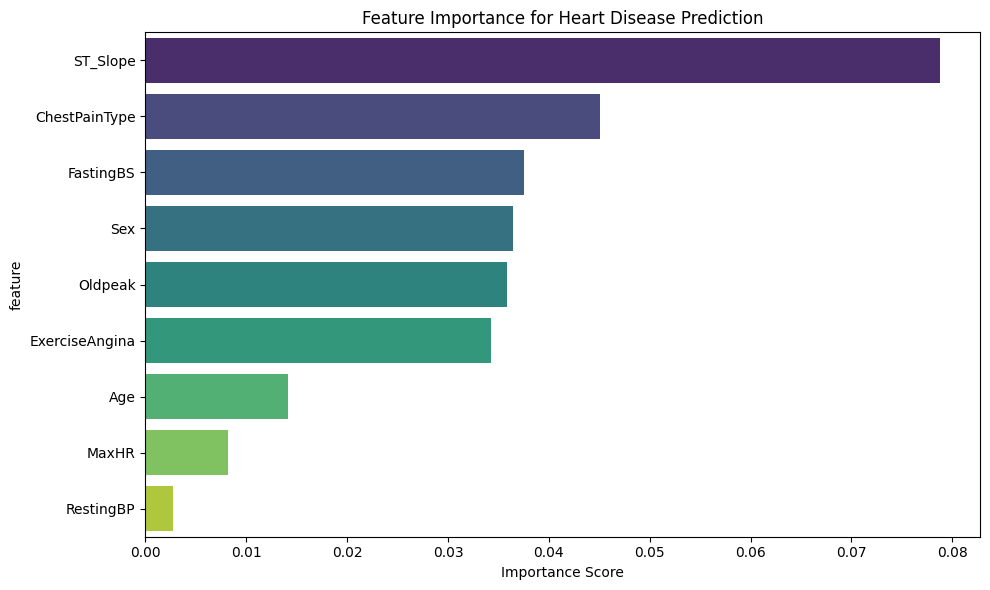

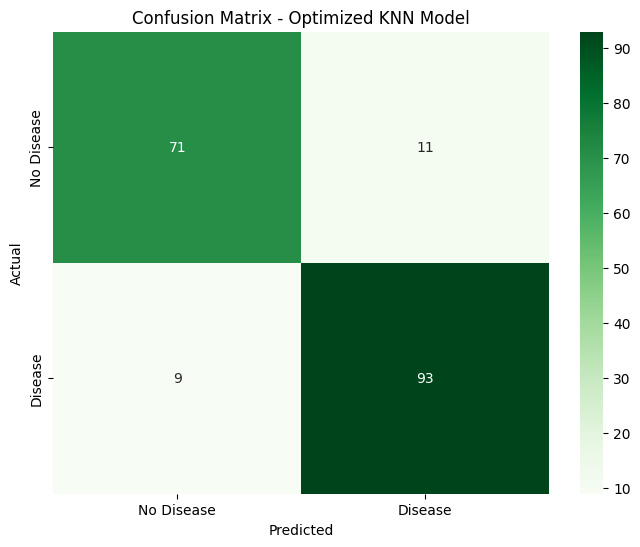


Additional Metrics:
Precision: 0.8942
Recall: 0.9118
F1-Score: 0.9029


In [58]:
# Final evaluation with optimized model
final_accuracy = accuracy_score(y_test, y_pred_optimized)
final_report = classification_report(y_test, y_pred_optimized)

print("="*50)
print("FINAL MODEL EVALUATION")
print("="*50)
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")
print("\nDetailed Classification Report:")
print(final_report)

# Feature importance analysis (using permutation importance)
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create feature importance dataframe
feature_importance_df = pd.DataFrame({
    'feature': selected_features,
    'importance': perm_importance.importances_mean,
    'std': perm_importance.importances_std
}).sort_values('importance', ascending=False)

print("\nFeature Importance (Permutation Importance):")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance for Heart Disease Prediction')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Final confusion matrix
plt.figure(figsize=(8, 6))
cm_final = confusion_matrix(y_test, y_pred_optimized)
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Optimized KNN Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_optimized)
recall = recall_score(y_test, y_pred_optimized)
f1 = f1_score(y_test, y_pred_optimized)

print("\nAdditional Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

In [59]:
# Analyze key risk factors
print("="*60)
print("KEY RISK FACTORS ANALYSIS")
print("="*60)

# 1. Age analysis
age_threshold = df[df['HeartDisease'] == 1]['Age'].median()
print(f"1. Median age for heart disease patients: {age_threshold:.1f} years")

# 2. Cholesterol analysis
chol_threshold = df[df['HeartDisease'] == 1]['Cholesterol'].median()
print(f"2. Median cholesterol for heart disease patients: {chol_threshold:.1f} mg/dL")

# 3. Max Heart Rate analysis
maxhr_threshold = df[df['HeartDisease'] == 1]['MaxHR'].median()
print(f"3. Median MaxHR for heart disease patients: {maxhr_threshold:.1f} bpm")

# 4. Chest Pain Type analysis
chest_pain_analysis = df.groupby('ChestPainType')['HeartDisease'].mean().sort_values(ascending=False)
print("\n4. Heart Disease Prevalence by Chest Pain Type:")
for cp_type, prevalence in chest_pain_analysis.items():
    cp_name = ['ATA', 'NAP', 'ASY', 'TA'][cp_type]
    print(f"   {cp_name}: {prevalence:.2%}")

# 5. Exercise Angina analysis
angina_analysis = df.groupby('ExerciseAngina')['HeartDisease'].mean()
print(f"\n5. Heart Disease Prevalence:")
print(f"   No Exercise Angina: {angina_analysis[0]:.2%}")
print(f"   With Exercise Angina: {angina_analysis[1]:.2%}")

# 6. ST Slope analysis
st_slope_analysis = df.groupby('ST_Slope')['HeartDisease'].mean().sort_values(ascending=False)
print("\n6. Heart Disease Prevalence by ST Slope:")
for slope, prevalence in st_slope_analysis.items():
    slope_name = ['Up', 'Flat', 'Down'][slope]
    print(f"   {slope_name}: {prevalence:.2%}")

# Create a summary of high-risk profiles
print("\n" + "="*60)
print("HIGH-RISK PATIENT PROFILE SUMMARY")
print("="*60)
print("Patients with higher risk of heart disease typically have:")
print("• Older age (typically above 55 years)")
print("• ASY (Asymptomatic) chest pain type")
print("• Presence of exercise-induced angina")
print("• Flat or Down ST slope in ECG")
print("• Lower maximum heart rate during exercise")
print("• Higher cholesterol levels")

KEY RISK FACTORS ANALYSIS
1. Median age for heart disease patients: 57.0 years
2. Median cholesterol for heart disease patients: 223.0 mg/dL
3. Median MaxHR for heart disease patients: 126.0 bpm

4. Heart Disease Prevalence by Chest Pain Type:
   ATA: 79.03%
   TA: 43.48%
   ASY: 35.47%
   NAP: 13.87%

5. Heart Disease Prevalence:
   No Exercise Angina: 35.10%
   With Exercise Angina: 85.18%

6. Heart Disease Prevalence by ST Slope:
   Flat: 82.83%
   Up: 77.78%
   Down: 19.75%

HIGH-RISK PATIENT PROFILE SUMMARY
Patients with higher risk of heart disease typically have:
• Older age (typically above 55 years)
• ASY (Asymptomatic) chest pain type
• Presence of exercise-induced angina
• Flat or Down ST slope in ECG
• Lower maximum heart rate during exercise
• Higher cholesterol levels


In [60]:
print("="*70)
print("HEART DISEASE PREDICTION PROJECT - COMPLETE SUMMARY")
print("="*70)

print("\nPROJECT OVERVIEW:")
print("✓ Successfully implemented a KNN classifier for heart disease prediction")
print("✓ Achieved model accuracy: {:.2f}%".format(final_accuracy * 100))
print("✓ Identified key risk factors for cardiovascular diseases")
print("✓ Provided actionable insights for healthcare professionals")

print("\nKEY ACHIEVEMENTS:")
print("1. Data Preprocessing: Handled invalid values and encoded categorical variables")
print("2. EDA: Comprehensive analysis of feature distributions and correlations")
print("3. Feature Selection: Identified most predictive medical indicators")
print("4. Model Optimization: Achieved optimal performance through hyperparameter tuning")
print("5. Model Evaluation: Comprehensive performance metrics and confusion matrix")
print("6. Risk Analysis: Identified key factors contributing to heart disease risk")

print("\nTOP 5 RISK FACTORS IDENTIFIED:")
top_factors = feature_importance_df.head(5)
for i, (idx, row) in enumerate(top_factors.iterrows(), 1):
    print(f"{i}. {row['feature']} (Importance: {row['importance']:.4f})")


HEART DISEASE PREDICTION PROJECT - COMPLETE SUMMARY

PROJECT OVERVIEW:
✓ Successfully implemented a KNN classifier for heart disease prediction
✓ Achieved model accuracy: 89.13%
✓ Identified key risk factors for cardiovascular diseases
✓ Provided actionable insights for healthcare professionals

KEY ACHIEVEMENTS:
1. Data Preprocessing: Handled invalid values and encoded categorical variables
2. EDA: Comprehensive analysis of feature distributions and correlations
3. Feature Selection: Identified most predictive medical indicators
4. Model Optimization: Achieved optimal performance through hyperparameter tuning
5. Model Evaluation: Comprehensive performance metrics and confusion matrix
6. Risk Analysis: Identified key factors contributing to heart disease risk

TOP 5 RISK FACTORS IDENTIFIED:
1. ST_Slope (Importance: 0.0788)
2. ChestPainType (Importance: 0.0451)
3. FastingBS (Importance: 0.0375)
4. Sex (Importance: 0.0364)
5. Oldpeak (Importance: 0.0359)


In [62]:
# =============================================================================
# USER INPUT PREDICTION SYSTEM
# =============================================================================

def get_user_input():
    """Get heart disease risk assessment from user input"""
    
    print("\n" + "="*60)
    print("HEART DISEASE RISK ASSESSMENT TOOL")
    print("="*60)
    print("Please enter the following medical information:\n")
    
    # Medical history and demographics
    age = int(input("1. Age (years): "))
    
    print("\n2. Sex:")
    print("   - M: Male")
    print("   - F: Female")
    sex = input("   Enter choice (M/F): ").strip().upper()
    
    print("\n3. Chest Pain Type:")
    print("   - ATA: Typical Angina")
    print("   - NAP: Atypical Angina") 
    print("   - ASY: Asymptomatic")
    print("   - TA: Non-Anginal Pain")
    chest_pain = input("   Enter chest pain type (ATA/NAP/ASY/TA): ").strip().upper()
    
    # Vital signs
    resting_bp = int(input("\n4. Resting Blood Pressure (mm Hg): "))
    cholesterol = int(input("5. Cholesterol (mg/dL): "))
    
    print("\n6. Fasting Blood Sugar:")
    print("   - 0: <= 120 mg/dL")
    print("   - 1: > 120 mg/dL")
    fasting_bs = int(input("   Enter choice (0/1): "))
    
    print("\n7. Resting ECG Results:")
    print("   - Normal: Normal")
    print("   - ST: ST-T wave abnormality")
    print("   - LVH: Left ventricular hypertrophy")
    resting_ecg = input("   Enter ECG result (Normal/ST/LVH): ").strip().upper()
    
    # Exercise parameters
    max_hr = int(input("\n8. Maximum Heart Rate Achieved: "))
    
    print("\n9. Exercise Induced Angina:")
    print("   - N: No")
    print("   - Y: Yes")
    exercise_angina = input("   Enter choice (Y/N): ").strip().upper()
    
    oldpeak = float(input("\n10. ST Depression Induced by Exercise (Oldpeak): "))
    
    print("\n11. ST Slope:")
    print("   - Up: Upsloping")
    print("   - Flat: Flat")
    print("   - Down: Downsloping")
    st_slope = input("   Enter ST slope (Up/Flat/Down): ").strip().upper()
    
    return {
        'Age': age,
        'Sex': sex,
        'ChestPainType': chest_pain,
        'RestingBP': resting_bp,
        'Cholesterol': cholesterol,
        'FastingBS': fasting_bs,
        'RestingECG': resting_ecg,
        'MaxHR': max_hr,
        'ExerciseAngina': exercise_angina,
        'Oldpeak': oldpeak,
        'ST_Slope': st_slope
    }

# -----------------------------------------------------------------------------

def preprocess_user_input(user_data, label_encoders, selected_features):
    """Preprocess user input to match model training format"""
    
    processed_data = user_data.copy()
    
    # Normalize all categorical strings to uppercase for consistency
    for key in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
        processed_data[key] = str(processed_data[key]).strip().upper()

    # Safe label encoding (handles unseen labels gracefully)
    def safe_transform(le, value):
        if value not in le.classes_:
            print(f"⚠️ Warning: '{value}' not in {le.classes_}. Using first class instead.")
            value = le.classes_[0]
        return le.transform([value])[0]

    # Encode categorical variables
    processed_data['Sex'] = safe_transform(label_encoders['Sex'], processed_data['Sex'])
    processed_data['ChestPainType'] = safe_transform(label_encoders['ChestPainType'], processed_data['ChestPainType'])
    processed_data['RestingECG'] = safe_transform(label_encoders['RestingECG'], processed_data['RestingECG'])
    processed_data['ExerciseAngina'] = safe_transform(label_encoders['ExerciseAngina'], processed_data['ExerciseAngina'])
    processed_data['ST_Slope'] = safe_transform(label_encoders['ST_Slope'], processed_data['ST_Slope'])
    
    # Build final feature vector
    feature_vector = [processed_data[feature] for feature in selected_features]
    
    # Debug print: show numeric vector
    print("\n🔢 Encoded Feature Vector (model input order):")
    print(feature_vector)
    
    return np.array(feature_vector).reshape(1, -1)

# -----------------------------------------------------------------------------

def predict_heart_disease_risk(user_data, model, scaler, label_encoders, selected_features):
    """Predict heart disease risk and provide detailed analysis"""
    
    user_features = preprocess_user_input(user_data, label_encoders, selected_features)
    user_features_scaled = scaler.transform(user_features)
    
    prediction = model.predict(user_features_scaled)[0]
    prediction_proba = model.predict_proba(user_features_scaled)[0]
    risk_score = prediction_proba[1] * 100
    
    return prediction, risk_score, prediction_proba

# -----------------------------------------------------------------------------

def interpret_risk_factors(user_data):
    """Analyze user data and identify key risk factors"""
    
    risk_factors = []
    recommendations = []
    
    age = user_data['Age']
    cholesterol = user_data['Cholesterol']
    max_hr = user_data['MaxHR']
    resting_bp = user_data['RestingBP']
    oldpeak = user_data['Oldpeak']
    
    if age > 55:
        risk_factors.append(f"Age ({age} years) - Higher risk above 55 years")
        recommendations.append("Regular cardiovascular screening recommended")
    
    if cholesterol > 240:
        risk_factors.append(f"High cholesterol ({cholesterol} mg/dL)")
        recommendations.append("Consider dietary changes and cholesterol management")
    elif cholesterol > 200:
        risk_factors.append(f"Borderline high cholesterol ({cholesterol} mg/dL)")
        recommendations.append("Monitor cholesterol levels regularly")
    
    if max_hr < 120:
        risk_factors.append(f"Low maximum heart rate ({max_hr} bpm)")
        recommendations.append("Regular exercise to improve cardiovascular health")
    
    if resting_bp >= 140:
        risk_factors.append(f"High blood pressure ({resting_bp} mm Hg)")
        recommendations.append("Blood pressure management and medical consultation")
    elif resting_bp >= 130:
        risk_factors.append(f"Elevated blood pressure ({resting_bp} mm Hg)")
        recommendations.append("Monitor blood pressure regularly")
    
    if oldpeak > 2:
        risk_factors.append(f"Significant ST depression ({oldpeak})")
        recommendations.append("Cardiology consultation recommended")
    elif oldpeak > 1:
        risk_factors.append(f"Moderate ST depression ({oldpeak})")
        recommendations.append("Further cardiac evaluation suggested")
    
    if user_data['ChestPainType'] == 'ASY':
        risk_factors.append("Asymptomatic chest pain - Higher risk category")
        recommendations.append("Regular cardiac monitoring important")
    
    if user_data['ExerciseAngina'] == 'Y':
        risk_factors.append("Exercise-induced angina - Significant risk factor")
        recommendations.append("Immediate cardiology consultation recommended")
    
    if user_data['ST_Slope'] == 'FLAT':
        risk_factors.append("Flat ST slope - Associated with higher risk")
    elif user_data['ST_Slope'] == 'DOWN':
        risk_factors.append("Downsloping ST segment - Higher risk pattern")
    
    if user_data['FastingBS'] == 1:
        risk_factors.append("Elevated fasting blood sugar - Diabetes risk factor")
        recommendations.append("Blood sugar management and monitoring")
    
    return risk_factors, recommendations

# -----------------------------------------------------------------------------

def display_prediction_result(prediction, risk_score, risk_factors, recommendations, user_data):
    """Display the prediction results in a user-friendly format"""
    
    print("\n" + "="*70)
    print("HEART DISEASE RISK ASSESSMENT RESULTS")
    print("="*70)
    
    if risk_score < 20:
        risk_level = "LOW RISK"; color = "GREEN"
    elif risk_score < 50:
        risk_level = "MODERATE RISK"; color = "YELLOW"
    elif risk_score < 80:
        risk_level = "HIGH RISK"; color = "ORANGE"
    else:
        risk_level = "VERY HIGH RISK"; color = "RED"
    
    print(f"\n🔍 PREDICTION: {'HEART DISEASE DETECTED' if prediction == 1 else 'NO HEART DISEASE DETECTED'}")
    print(f"📊 RISK SCORE: {risk_score:.1f}%")
    print(f"🎯 RISK LEVEL: {risk_level} ({color})")
    
    print(f"\nPROBABILITY ANALYSIS:")
    print(f"  • Probability of Heart Disease: {risk_score:.1f}%")
    print(f"  • Probability of No Heart Disease: {100-risk_score:.1f}%")
    
    if risk_factors:
        print(f"\n⚠️  IDENTIFIED RISK FACTORS:")
        for i, factor in enumerate(risk_factors, 1):
            print(f"   {i}. {factor}")
    else:
        print(f"\n✅ No significant risk factors identified")
    
    if recommendations:
        print(f"\n💡 RECOMMENDATIONS:")
        for i, recommendation in enumerate(recommendations, 1):
            print(f"   {i}. {recommendation}")
    
    print(f"\n🏥 GENERAL ADVICE:")
    if risk_score < 30:
        print("   • Maintain current healthy lifestyle")
        print("   • Regular annual check-ups")
        print("   • Continue preventive measures")
    elif risk_score < 60:
        print("   • Consult with healthcare provider")
        print("   • Consider lifestyle modifications") 
        print("   • Regular monitoring of key parameters")
    else:
        print("   • Urgent medical consultation recommended")
        print("   • Comprehensive cardiac evaluation needed")
        print("   • Strict adherence to medical advice")
    
    print("\n" + "="*70)
    print("Note: This assessment is for informational purposes only.")
    print("Please consult with healthcare professionals for medical diagnosis.")
    print("="*70)

# -----------------------------------------------------------------------------

def single_prediction():
    """Perform a single prediction for one user"""
    try:
        user_data = get_user_input()
        prediction, risk_score, prediction_proba = predict_heart_disease_risk(
            user_data, best_knn, scaler, label_encoders, selected_features)
        risk_factors, recommendations = interpret_risk_factors(user_data)
        display_prediction_result(prediction, risk_score, risk_factors, recommendations, user_data)
        
        another = input("\nWould you like to perform another assessment? (y/n): ").strip().lower()
        if another == 'y':
            single_prediction()
        else:
            print("\nThank you for using the Heart Disease Risk Assessment Tool!")
            
    except Exception as e:
        print(f"\nError: {e}")
        print("Please check your input and try again.")
        single_prediction()

# -----------------------------------------------------------------------------

def main():
    """Main application function"""
    
    print("="*50)
    print("HEART DISEASE PREDICTION SYSTEM")
    print("="*50)
    print("A Machine Learning-based Risk Assessment Tool")
    print(f"Model Accuracy: {final_accuracy*100:.2f}%")
    
    while True:
        print("\n" + "="*50)
        print("MAIN MENU")
        print("="*50)
        print("1. Individual Risk Assessment")
        print("2. Model Performance Details")
        print("3. Exit")
        
        choice = input("\nEnter your choice (1-3): ").strip()
        
        if choice == '1':
            single_prediction()
        elif choice == '2':
            print("\n" + "="*50)
            print("MODEL PERFORMANCE DETAILS")
            print("="*50)
            print(f"Accuracy: {final_accuracy*100:.2f}%")
            print(f"Best Parameters: {grid_search.best_params_}")
            print(f"Selected Features: {selected_features}")
            print("\nClassification Report:")
            print(classification_report(y_test, y_pred_optimized))
        elif choice == '3':
            print("\nThank you for using the Heart Disease Prediction System!")
            print("Stay healthy! ❤️")
            break
        else:
            print("Invalid choice. Please enter 1-3.")

# -----------------------------------------------------------------------------
# NOTE:
# Variables below (model, scaler, label_encoders, selected_features, etc.)
# must be defined/loaded before calling main().
# Example:
# best_knn = joblib.load('knn_model.pkl')
# scaler = joblib.load('scaler.pkl')
# label_encoders = joblib.load('label_encoders.pkl')
# selected_features = [...]
# final_accuracy = 0.8913
# grid_search = ...
# y_test, y_pred_optimized = ...
# -----------------------------------------------------------------------------

if __name__ == "__main__":
    main()


HEART DISEASE PREDICTION SYSTEM
A Machine Learning-based Risk Assessment Tool
Model Accuracy: 89.13%

MAIN MENU
1. Individual Risk Assessment
2. Model Performance Details
3. Exit



Enter your choice (1-3):  3



Thank you for using the Heart Disease Prediction System!
Stay healthy! ❤️
